### Preprocessing
---
#### [Method]
#### 1. histogram
#### 2. threshold

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Set Config
CONFIG = {
    "data_dir": "./data_2.csv"
    , "max_threshold": -0.4644337538583051
    , "mean_threshold": -1.5389549869206072
}

In [5]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0).T
rawdata

GeneSymbol,1-Mar,1-Mar,1-Mar,2-Mar,2-Mar,2-Mar,3-Mar,3-Mar,4-Mar,5-Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCE-group1,1.852497,0.117975,0.096768,2.258558,1.565394,0.951552,89.512565,59.216253,1.611960,1.441417,...,0.030428,0.027581,0.019023,0.015966,0.012914,0.010145,0.008056,0.007782,0.003657,0.002025
HCE-group2,1.095036,0.104545,0.102656,1.822708,1.508817,1.068145,80.511893,65.378596,2.374740,1.643976,...,0.037001,0.024705,0.028065,0.027993,0.011780,0.008080,0.007229,0.019845,0.004915,0.001820
HCE-group3,1.289244,0.223035,0.140014,1.879612,1.655656,0.987388,89.221036,80.427167,0.968084,1.596748,...,0.080276,0.029031,0.038464,0.023639,0.013711,0.009553,0.010577,0.022200,0.008151,0.002139
iPS-1,0.795035,2.326683,2.433341,1.053267,1.291705,1.050282,0.290673,0.861818,1.354134,0.425520,...,7.548912,0.017927,1.836428,1.967620,6.261272,3.290751,1.066276,1.643213,2.105379,0.682089
iPS-2,0.813065,2.830170,3.330543,1.337434,1.436007,1.012773,0.547228,1.200644,1.113175,0.550807,...,3.198438,0.018212,1.915520,1.807458,8.964918,2.898218,0.930122,2.253860,1.928423,0.514673
iPS-3,0.712260,2.303361,2.855312,0.995234,1.493473,0.916881,0.527325,1.106951,1.032968,0.524999,...,5.487027,0.015698,1.589922,1.633464,9.723765,2.608060,0.880221,2.886146,1.745888,0.457960
CECSi -1,66.717323,1.040646,0.979447,1.200681,1.421945,1.376088,3.387656,4.717717,14.015582,1.002661,...,0.286610,0.019466,0.738614,0.833685,0.181713,0.081033,0.529764,0.996136,0.801392,0.694796
CECSi -2,56.733482,0.980855,1.026891,1.250500,1.690599,1.684334,4.955218,5.193243,9.758420,0.861033,...,0.259396,0.017610,0.946701,0.948059,0.142464,0.023932,0.833234,1.003879,1.010467,0.997505
CECSi -3,56.656556,1.019519,1.020984,1.533656,1.425587,1.761829,4.474247,5.482150,8.543179,0.997346,...,0.223554,0.017058,0.979280,0.966614,0.125888,0.019081,0.633620,0.871975,0.989641,1.052928
NCC-1,1.538074,1.739433,2.030810,0.331068,0.497219,0.626695,1.291381,0.551392,0.801544,1.156930,...,1.969104,2.092500,1.783416,1.249824,2.787335,1.964172,1.164651,2.777873,1.247950,1.644203


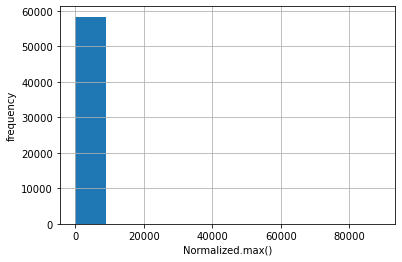

In [6]:
plt.hist(rawdata.max(axis=0), bins=10)
plt.grid()
plt.xlabel("Normalized.max()")
plt.ylabel("frequency")
plt.savefig("./normalized_max.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

-0.4644337538583051


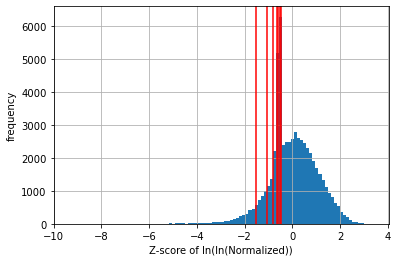

In [9]:
zmax = stats.zscore(np.log(np.log(rawdata.max())))
plt.grid()
plt.xlabel("Z-score of ln(ln(Normalized))")
plt.ylabel("frequency")
plt.hist(zmax, bins=100)
plt.savefig("./Zscore_ln(ln(normalized_max)).png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)
for i in range(1, 8):
    v = np.percentile(zmax, 5*i)
    plt.axvline(x=v, c="r")
    
print(np.percentile(zmax, 35))

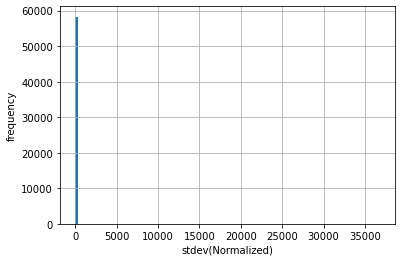

In [10]:
# stdev_thresholdを考えような感じ-log ver.
std = rawdata.std()
plt.xlabel("stdev(Normalized)")
plt.ylabel("frequency")
std.hist(bins=100)
plt.savefig("./stdev(normalized).png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

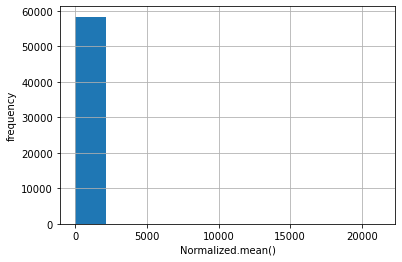

In [11]:
plt.hist(rawdata.mean(axis=0), bins=10)
plt.grid()
plt.xlabel("Normalized.mean()")
plt.ylabel("frequency")
plt.savefig("./normalized_mean.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

-1.5389549869206072


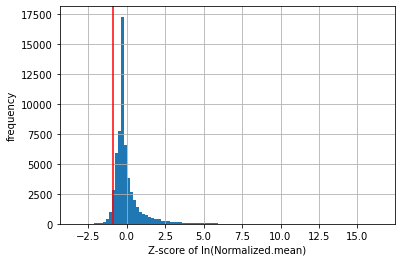

In [12]:
zmean = stats.zscore(np.log(rawdata.mean()))
plt.grid()
plt.xlabel("Z-score of ln(Normalized.mean)")
plt.ylabel("frequency")
plt.hist(zmean, bins=100)
plt.savefig("./Zscore_ln(normalized_mean).png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)
for i in range(1, 2):
    v = np.percentile(zmean, 5*i)
    plt.axvline(x=v, c="r")

print(np.percentile(zmax, 5))

In [15]:
df = rawdata.loc[:, stats.zscore(np.log(np.log(rawdata.max())))>CONFIG["max_threshold"]]
df.to_csv(f"data_Zscore(ln(ln(max)))>{CONFIG['max_threshold']}.csv", index=True)
df

GeneSymbol,1-Mar,1-Mar,1-Mar,2-Mar,2-Mar,2-Mar,3-Mar,3-Mar,4-Mar,5-Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCE-group1,1.852497,0.117975,0.096768,2.258558,1.565394,0.951552,89.512565,59.216253,1.611960,1.441417,...,0.031268,0.030428,0.027581,0.019023,0.015966,0.012914,0.010145,0.007782,0.003657,0.002025
HCE-group2,1.095036,0.104545,0.102656,1.822708,1.508817,1.068145,80.511893,65.378596,2.374740,1.643976,...,0.026058,0.037001,0.024705,0.028065,0.027993,0.011780,0.008080,0.019845,0.004915,0.001820
HCE-group3,1.289244,0.223035,0.140014,1.879612,1.655656,0.987388,89.221036,80.427167,0.968084,1.596748,...,0.030433,0.080276,0.029031,0.038464,0.023639,0.013711,0.009553,0.022200,0.008151,0.002139
iPS-1,0.795035,2.326683,2.433341,1.053267,1.291705,1.050282,0.290673,0.861818,1.354134,0.425520,...,1.284221,7.548912,0.017927,1.836428,1.967620,6.261272,3.290751,1.643213,2.105379,0.682089
iPS-2,0.813065,2.830170,3.330543,1.337434,1.436007,1.012773,0.547228,1.200644,1.113175,0.550807,...,1.620167,3.198438,0.018212,1.915520,1.807458,8.964918,2.898218,2.253860,1.928423,0.514673
iPS-3,0.712260,2.303361,2.855312,0.995234,1.493473,0.916881,0.527325,1.106951,1.032968,0.524999,...,1.765803,5.487027,0.015698,1.589922,1.633464,9.723765,2.608060,2.886146,1.745888,0.457960
CECSi -1,66.717323,1.040646,0.979447,1.200681,1.421945,1.376088,3.387656,4.717717,14.015582,1.002661,...,0.349408,0.286610,0.019466,0.738614,0.833685,0.181713,0.081033,0.996136,0.801392,0.694796
CECSi -2,56.733482,0.980855,1.026891,1.250500,1.690599,1.684334,4.955218,5.193243,9.758420,0.861033,...,0.367490,0.259396,0.017610,0.946701,0.948059,0.142464,0.023932,1.003879,1.010467,0.997505
CECSi -3,56.656556,1.019519,1.020984,1.533656,1.425587,1.761829,4.474247,5.482150,8.543179,0.997346,...,0.396493,0.223554,0.017058,0.979280,0.966614,0.125888,0.019081,0.871975,0.989641,1.052928
NCC-1,1.538074,1.739433,2.030810,0.331068,0.497219,0.626695,1.291381,0.551392,0.801544,1.156930,...,1.635369,1.969104,2.092500,1.783416,1.249824,2.787335,1.964172,2.777873,1.247950,1.644203


In [14]:
df2 = rawdata.loc[:, stats.zscore(np.log(rawdata.mean()))>CONFIG["mean_threshold"]]
df2

GeneSymbol,1-Mar,1-Mar,1-Mar,2-Mar,2-Mar,2-Mar,3-Mar,3-Mar,4-Mar,5-Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCE-group1,1.852497,0.117975,0.096768,2.258558,1.565394,0.951552,89.512565,59.216253,1.611960,1.441417,...,0.031268,0.030428,0.019023,0.015966,0.012914,0.010145,0.008056,0.007782,0.003657,0.002025
HCE-group2,1.095036,0.104545,0.102656,1.822708,1.508817,1.068145,80.511893,65.378596,2.374740,1.643976,...,0.026058,0.037001,0.028065,0.027993,0.011780,0.008080,0.007229,0.019845,0.004915,0.001820
HCE-group3,1.289244,0.223035,0.140014,1.879612,1.655656,0.987388,89.221036,80.427167,0.968084,1.596748,...,0.030433,0.080276,0.038464,0.023639,0.013711,0.009553,0.010577,0.022200,0.008151,0.002139
iPS-1,0.795035,2.326683,2.433341,1.053267,1.291705,1.050282,0.290673,0.861818,1.354134,0.425520,...,1.284221,7.548912,1.836428,1.967620,6.261272,3.290751,1.066276,1.643213,2.105379,0.682089
iPS-2,0.813065,2.830170,3.330543,1.337434,1.436007,1.012773,0.547228,1.200644,1.113175,0.550807,...,1.620167,3.198438,1.915520,1.807458,8.964918,2.898218,0.930122,2.253860,1.928423,0.514673
iPS-3,0.712260,2.303361,2.855312,0.995234,1.493473,0.916881,0.527325,1.106951,1.032968,0.524999,...,1.765803,5.487027,1.589922,1.633464,9.723765,2.608060,0.880221,2.886146,1.745888,0.457960
CECSi -1,66.717323,1.040646,0.979447,1.200681,1.421945,1.376088,3.387656,4.717717,14.015582,1.002661,...,0.349408,0.286610,0.738614,0.833685,0.181713,0.081033,0.529764,0.996136,0.801392,0.694796
CECSi -2,56.733482,0.980855,1.026891,1.250500,1.690599,1.684334,4.955218,5.193243,9.758420,0.861033,...,0.367490,0.259396,0.946701,0.948059,0.142464,0.023932,0.833234,1.003879,1.010467,0.997505
CECSi -3,56.656556,1.019519,1.020984,1.533656,1.425587,1.761829,4.474247,5.482150,8.543179,0.997346,...,0.396493,0.223554,0.979280,0.966614,0.125888,0.019081,0.633620,0.871975,0.989641,1.052928
NCC-1,1.538074,1.739433,2.030810,0.331068,0.497219,0.626695,1.291381,0.551392,0.801544,1.156930,...,1.635369,1.969104,1.783416,1.249824,2.787335,1.964172,1.164651,2.777873,1.247950,1.644203
